In [211]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, WhiteKernel
import sklearn as skl

In [212]:
N = 25
MIN_VAL = 0
MAX_VAL = 100
SAMPLE_NOISE = 0.1

In [213]:
# Generates n samples from [min_val, max_val] with Gaussian Noise (sigma = std dev of the noise distribution)
# f is the true function
def generate_samples(n, min_val, max_val, sigma, f):
    xs = np.linspace(min_val, max_val, n)
    ys = f(xs)
    
    ys = ys + np.random.normal(0, sigma, n)
    return xs.reshape(-1, 1), ys 

In [214]:
def f(xs):
    return np.sqrt(xs + np.sin(xs)) * (1 - xs / MAX_VAL)

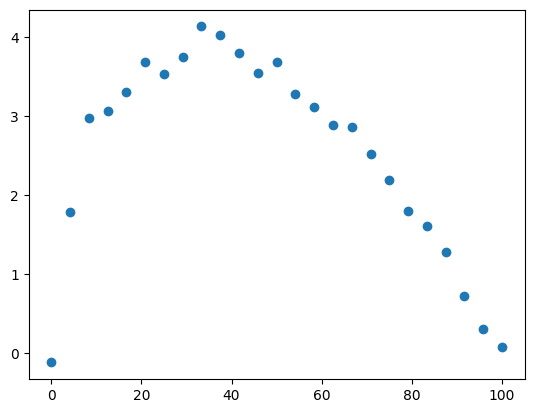

In [215]:
X, y = generate_samples(N, MIN_VAL, MAX_VAL, SAMPLE_NOISE, f)

plt.scatter(X, y)

In [216]:
k = 1.0 * RBF(length_scale=1, length_scale_bounds=(1e-2, 1e5)) \
    + 1.0 * DotProduct(sigma_0=1, sigma_0_bounds=(1e-5, 1e5)) * DotProduct(sigma_0=1, sigma_0_bounds=(1e-5, 1e5)) \
    + 1.0 * WhiteKernel(1, (1e-2, 1))
gpr = GaussianProcessRegressor(kernel=k)
gpr.fit(X, y)
gpr.kernel_

c:\Users\Joaquin\miniconda3\envs\agienv\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


0.733**2 * RBF(length_scale=6.57) + 0.00316**2 * DotProduct(sigma_0=20.4) * DotProduct(sigma_0=20.4) + 0.279**2 * WhiteKernel(noise_level=0.0882)

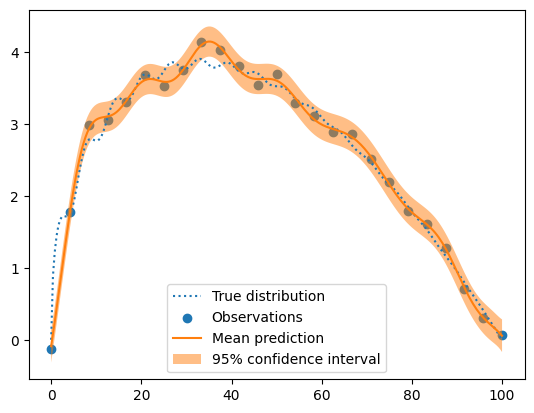

In [217]:
X_test = np.linspace(MIN_VAL, MAX_VAL, 10 * N).reshape(-1, 1)
X_true, Y_true = generate_samples(10 * N, MIN_VAL, MAX_VAL, 0, f)
pred_mean, pred_std = gpr.predict(X_test, return_std=True)

plt.plot(X_true, Y_true, label="True distribution", linestyle="dotted")
plt.scatter(X, y, label="Observations")
plt.plot(X_test, pred_mean, label="Mean prediction")
plt.fill_between(
    X_test.ravel(),
    pred_mean - 1.96 * pred_std,
    pred_mean + 1.96 * pred_std,
    alpha=0.5,
    label=r"95% confidence interval",
)

plt.legend()
plt.show()